# **Phase 1 Milestone 2** 
*Milestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Full Time Program Phase 2 khususnya pada Artificial Neural Network.*


### **i. PERKENALAN**

##### **Nama :Dennis Herdiawan**
##### **Batch : 004**

---

## **Objectives**
Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 2 :

- Mampu memahami konsep Artificial Neural Network.
- Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
- Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.
- Mampu menganalisis dan menjelaskan layer yang dibuat.



### **ii. Import pustaka yang dibutuhkan**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras import initializers, optimizers
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.metrics import recall_score, classification_report, accuracy_score, roc_auc_score, confusion_matrix


import warnings
warnings.filterwarnings("ignore")

### **iii. Data Loading**

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

### iv Data Cleaning

In [3]:
df.isnull().sum().any()

False

In [4]:
print(f"Is there any duplicated rows? \n{df.duplicated().any()}")
print(f"\nHow many? \n{df.duplicated().sum()} rows")

Is there any duplicated rows? 
False

How many? 
0 rows


In [5]:
df.drop(columns=['customerID'], inplace=True)

### v. Explorasi Data

In [6]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.shape

(7043, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
print(df['TotalCharges'].value_counts(), type(df['TotalCharges']))

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64 <class 'pandas.core.series.Series'>


In [10]:
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)

In [11]:
df.dropna(inplace=True)

In [12]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [13]:
repl = {0: 'No', 1: 'Yes'}

df['SeniorCitizen'].replace(repl, inplace=True)

In [14]:
dfDesc = []

for i in df.columns:
    dfDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum()) / (len(df))) * 100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(dfDesc, columns=['dataFeatures', 'dataType', 'null', '%null', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,%null,unique,uniqueSample
0,gender,object,0,0.0,2,"[Male, Female]"
1,SeniorCitizen,object,0,0.0,2,"[Yes, No]"
2,Partner,object,0,0.0,2,"[Yes, No]"
3,Dependents,object,0,0.0,2,"[No, Yes]"
4,tenure,int64,0,0.0,72,"[37, 17]"
5,PhoneService,object,0,0.0,2,"[No, Yes]"
6,MultipleLines,object,0,0.0,3,"[No phone service, Yes]"
7,InternetService,object,0,0.0,3,"[Fiber optic, No]"
8,OnlineSecurity,object,0,0.0,3,"[No internet service, Yes]"
9,OnlineBackup,object,0,0.0,3,"[Yes, No internet service]"


In [15]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [16]:
df.describe(include='O')

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


### EDA

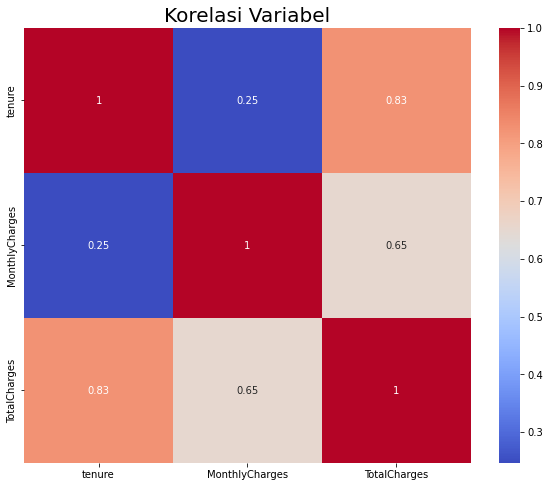

In [17]:
plt.figure(figsize=(10,8))
plt.title('Korelasi Variabel', size = 20)
sns.heatmap(df.corr(), cmap='coolwarm', annot = True)
plt.show()

Korelasi yang tinggi pada kategori 'tenure'

### <span> **1. Target Variable** </span>

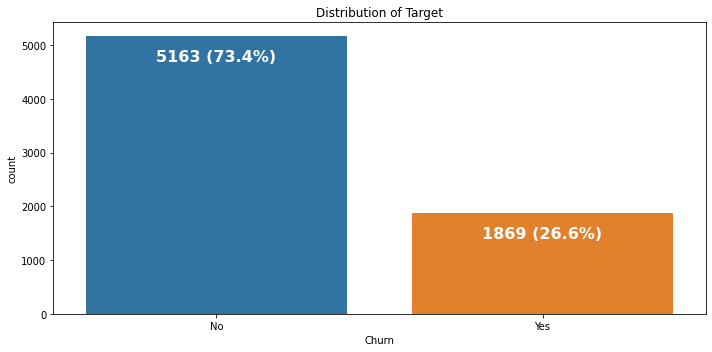

In [18]:
plt.figure(figsize = (10, 5))
ax = sns.countplot(
    x = df["Churn"]
)
ax.set_title("Distribution of Target")
# annotate bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f') + " (" + format(p.get_height()*100/len(df), '.1f') + "%)",
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 16,
        xytext = (0, -25), 
        textcoords = 'offset points',
        color = 'white'
    )
plt.tight_layout()
plt.show()

Kami mencoba memprediksi jika klien meninggalkan perusahaan pada bulan sebelumnya. Oleh karena itu kami memiliki masalah klasifikasi biner dengan target yang sedikit tidak seimbang:

* Churn: Tidak - 72,4%
* Churn: Ya - 27,6%

### <span> **1. Categorical Feature** </span>

Dataset ini memiliki 16 fitur kategoris:

* Enam fitur biner (Ya/Tidak)
* Sembilan fitur dengan masing-masing tiga nilai unik (kategori)
* Satu fitur dengan empat nilai unik

### <span>1.1 Gender and Age(SeniorCitizen)</span>

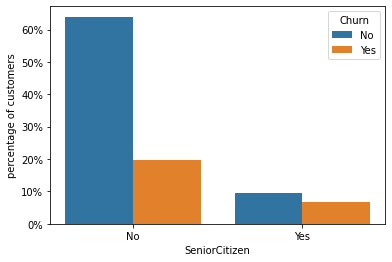

In [19]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = df.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("SeniorCitizen")


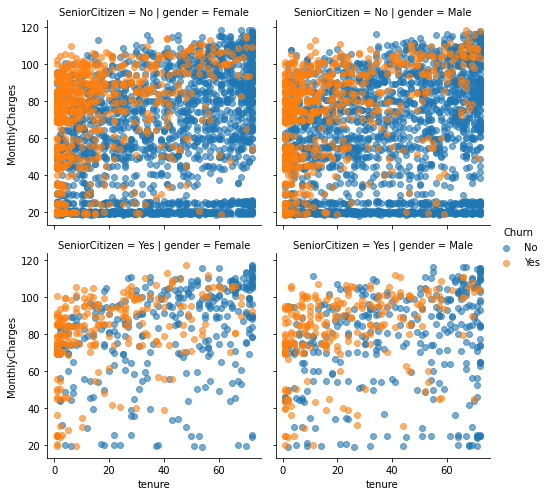

In [20]:
g = sns.FacetGrid(df, row='SeniorCitizen', col='gender', hue='Churn', height=3.5)
g.map(plt.scatter, 'tenure', 'MonthlyCharges', alpha=0.6)
g.add_legend();

* Gender bukan merupakan indikasi dari churn.
* SeniorCitizens hanya 16% dari pelanggan, tetapi mereka memiliki tingkat churn yang jauh lebih tinggi: 42% dibandingkan 23% untuk pelanggan non-senior.
* Tidak ada hubungan khusus antara nilai kategorikal ini dan fitur numerik utama.

### <span>1.2 Partner and dependents</span>

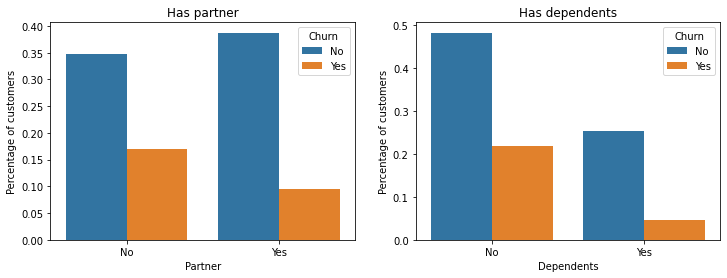

In [21]:
fig,axis = plt.subplots(1,2,figsize=(12,4))
axis[0].set_title('Has partner')
axis[1].set_title('Has dependents')
axis_y = 'Percentage of customers'

#plot Partner column
gp_partner = df.groupby('Partner')['Churn'].value_counts()/len(df)
gp_partner = gp_partner.to_frame().rename({"Churn":axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y=axis_y, hue='Churn', data=gp_partner, ax=axis[0])


#plot Dependents column
gp_dependent = df.groupby('Dependents')['Churn'].value_counts()/len(df)
gp_dependent = gp_dependent.to_frame().rename({"Churn":axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y=axis_y, hue='Churn', data=gp_dependent, ax=axis[1])

* Pelanggan yang tidak memiliki mitra lebih cenderung churn
* Pelanggan tanpa tanggungan juga lebih cenderung churn

### <span>1.3 Phone and Internet Service</span>

Hanya ada dua layanan utama: telepon dan internet tetapi yang pertama memiliki banyak tambahan seperti pencadangan dan keamanan online.

#### Phone services

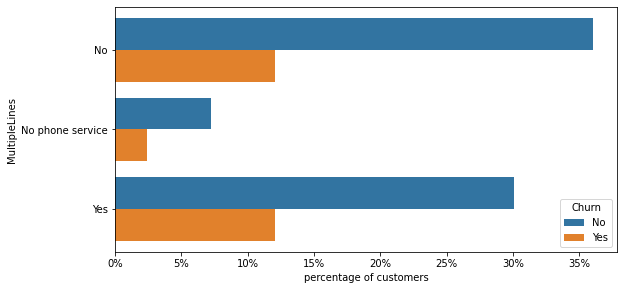

In [22]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("MultipleLines", orient='h')

#### Internet Service

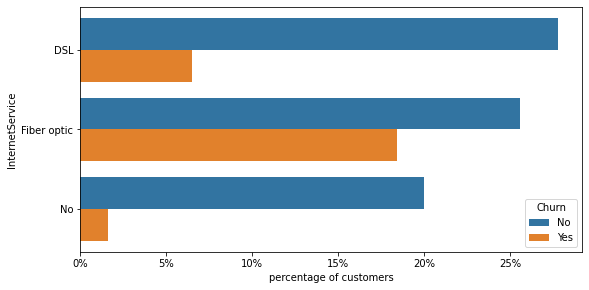

In [23]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("InternetService", orient='h')

### <span>1.4 Contract and Payment</span>

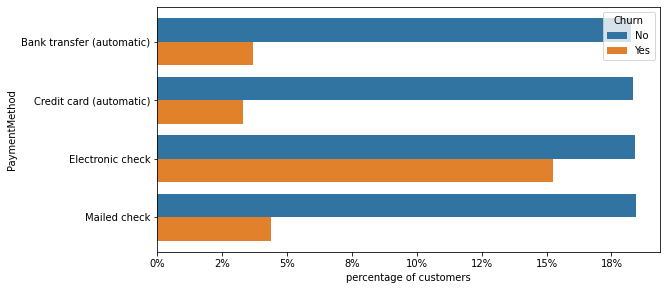

In [24]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("PaymentMethod", orient='h')

Beberapa pengamatan:

* Pelanggan dengan tagihan tanpa kertas lebih mungkin melakukan churn

* Metode pembayaran yang disukai adalah cek elektronik dengan sekitar 35% pelanggan. Metode ini juga memiliki tingkat churn yang sangat tinggi

* Kontrak jangka pendek memiliki tingkat churn yang lebih tinggi

 ### vi. Data Preprocessing

In [25]:
# converting the non-numeric data into numeric data.

encoded = df.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = encoded.drop('Churn', axis=1)
y = encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y,random_state=2021)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2,random_state=2021)

In [28]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [29]:
input_pipeline = Pipeline(steps=[
    ['scaler', MinMaxScaler()],
], memory="cache_folder")

In [30]:
input_pipeline.fit(X_train)

X_train = input_pipeline.transform(X_train)
X_val = input_pipeline.transform(X_val)
X_test = input_pipeline.transform(X_test)

In [31]:
datasets_train=tf.data.Dataset.from_tensor_slices((X_train,y_train))
datasets_val=tf.data.Dataset.from_tensor_slices((X_val,y_val))

In [32]:
datasets_train=datasets_train.shuffle(50).batch(64)
datasets_val=datasets_val.shuffle(50).batch(64)

In [33]:
print(X_train.shape)
print(y_train.shape)
print(y_train.value_counts())

(5834, 19)
(5834,)
0    2917
1    2917
Name: Churn, dtype: int64


### vii. Pendefinisian Model , viii Pelatihan Model, xi Evaluasi Model

## ANN Sequential

In [34]:
keras.backend.clear_session()
np.random.seed(2021)
tf.random.set_seed(2021)

In [35]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(17, input_shape=(19,),kernel_initializer='uniform', activation = 'relu'))
model.add(Dropout(0.3))

# Adding the second hidden layer
model.add(Dense(12, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.3))

# Adding the thirth hidden layer
model.add(Dense(9, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.3))

# Adding the output layer
model.add(Dense(1,kernel_initializer="uniform",activation="sigmoid"))

# Compiling the ANN
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['accuracy'])


In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 17)                340       
                                                                 
 dropout (Dropout)           (None, 17)                0         
                                                                 
 dense_1 (Dense)             (None, 12)                216       
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
 dense_2 (Dense)             (None, 9)                 117       
                                                                 
 dropout_2 (Dropout)         (None, 9)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [37]:
history = model.fit(datasets_train,epochs=100,batch_size=10,
                    validation_data=(datasets_val))

Epoch 1/100
92/92 [==============================] - 1s 2ms/step - loss: 0.2502 - accuracy: 0.4986 - val_loss: 0.2496 - val_accuracy: 0.7076
Epoch 2/100
92/92 [==============================] - 0s 1ms/step - loss: 0.2501 - accuracy: 0.5000 - val_loss: 0.2496 - val_accuracy: 0.7076
Epoch 3/100
92/92 [==============================] - 0s 1ms/step - loss: 0.2501 - accuracy: 0.5000 - val_loss: 0.2496 - val_accuracy: 0.7076
Epoch 4/100
92/92 [==============================] - 0s 1ms/step - loss: 0.2501 - accuracy: 0.5000 - val_loss: 0.2496 - val_accuracy: 0.7076
Epoch 5/100
92/92 [==============================] - 0s 1ms/step - loss: 0.2500 - accuracy: 0.5000 - val_loss: 0.2495 - val_accuracy: 0.7076
Epoch 6/100
92/92 [==============================] - 0s 1ms/step - loss: 0.2499 - accuracy: 0.5000 - val_loss: 0.2491 - val_accuracy: 0.7076
Epoch 7/100
92/92 [==============================] - 0s 1ms/step - loss: 0.2496 - accuracy: 0.5000 - val_loss: 0.2482 - val_accuracy: 0.7076
Epoch 8/100
9

Epoch 59/100
92/92 [==============================] - 0s 1ms/step - loss: 0.1609 - accuracy: 0.7857 - val_loss: 0.1719 - val_accuracy: 0.7310
Epoch 60/100
92/92 [==============================] - 0s 1ms/step - loss: 0.1598 - accuracy: 0.7878 - val_loss: 0.1722 - val_accuracy: 0.7299
Epoch 61/100
92/92 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.7876 - val_loss: 0.1730 - val_accuracy: 0.7259
Epoch 62/100
92/92 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.7881 - val_loss: 0.1728 - val_accuracy: 0.7279
Epoch 63/100
92/92 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.7900 - val_loss: 0.1726 - val_accuracy: 0.7310
Epoch 64/100
92/92 [==============================] - 0s 1ms/step - loss: 0.1578 - accuracy: 0.7885 - val_loss: 0.1722 - val_accuracy: 0.7330
Epoch 65/100
92/92 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.7893 - val_loss: 0.1730 - val_accuracy: 0.7299
Epoch 

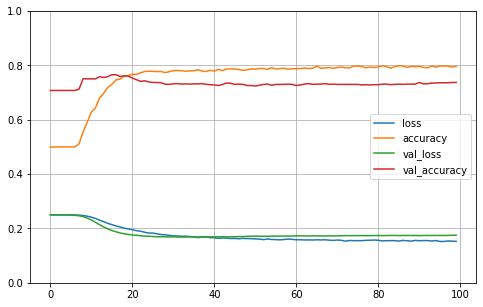

In [38]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

In [39]:
model.evaluate(X_test,y_test)

66/66 [==============================] - 0s 1ms/step - loss: 0.1750 - accuracy: 0.7379


[0.17499686777591705, 0.7379146814346313]

In [40]:
y_pred = model.predict(X_test)
print('Predict result: \n', y_pred[:5])
print('\n y_test: \n', y_test[:5])

Predict result: 
 [[0.17797825]
 [0.09280944]
 [0.56145614]
 [0.70266193]
 [0.6223232 ]]

 y_test: 
 5560    0
403     0
3677    0
3598    0
1317    0
Name: Churn, dtype: int32


In [41]:
predictions = []
for element in y_pred:
    if element > 0.5:
        predictions.append(1)
    else:
        predictions.append(0)

print(predictions[:5])

[0, 0, 1, 1, 1]


In [42]:
print(f"ACCURACY SCORE:\n{accuracy_score(y_test, predictions):.4f}")
print(f"Recall Score:\n{recall_score(y_test, predictions)}")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, predictions)}")

ACCURACY SCORE:
0.7379
Recall Score:
0.7308377896613191
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.88      0.74      0.81      1549
           1       0.50      0.73      0.60       561

    accuracy                           0.74      2110
   macro avg       0.69      0.74      0.70      2110
weighted avg       0.78      0.74      0.75      2110



## Functional API

In [43]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(20, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1, activation="sigmoid")(concat)
model2 = keras.models.Model(inputs=[input_], outputs=[output])
model2.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [44]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 19)]         0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 30)           600         ['input_1[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 20)           620         ['dense_4[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 39)           0           ['input_1[0][0]',                
                                                                  'dense_5[0][0]']            

In [45]:
history = model2.fit(datasets_train, epochs=100, validation_data=(datasets_val))

Epoch 1/100
92/92 [==============================] - 0s 2ms/step - loss: 0.2535 - accuracy: 0.5110 - val_loss: 0.2212 - val_accuracy: 0.6538
Epoch 2/100
92/92 [==============================] - 0s 1ms/step - loss: 0.2415 - accuracy: 0.5602 - val_loss: 0.2181 - val_accuracy: 0.6599
Epoch 3/100
92/92 [==============================] - 0s 1ms/step - loss: 0.2326 - accuracy: 0.6090 - val_loss: 0.2152 - val_accuracy: 0.6782
Epoch 4/100
92/92 [==============================] - 0s 1ms/step - loss: 0.2244 - accuracy: 0.6493 - val_loss: 0.2124 - val_accuracy: 0.6853
Epoch 5/100
92/92 [==============================] - 0s 1ms/step - loss: 0.2168 - accuracy: 0.6882 - val_loss: 0.2094 - val_accuracy: 0.6863
Epoch 6/100
92/92 [==============================] - 0s 1ms/step - loss: 0.2096 - accuracy: 0.7101 - val_loss: 0.2062 - val_accuracy: 0.6985
Epoch 7/100
92/92 [==============================] - 0s 1ms/step - loss: 0.2029 - accuracy: 0.7242 - val_loss: 0.2028 - val_accuracy: 0.7015
Epoch 8/100
9

Epoch 59/100
92/92 [==============================] - 0s 1ms/step - loss: 0.1422 - accuracy: 0.7988 - val_loss: 0.1801 - val_accuracy: 0.7330
Epoch 60/100
92/92 [==============================] - 0s 1ms/step - loss: 0.1421 - accuracy: 0.7996 - val_loss: 0.1800 - val_accuracy: 0.7330
Epoch 61/100
92/92 [==============================] - 0s 1ms/step - loss: 0.1419 - accuracy: 0.8000 - val_loss: 0.1800 - val_accuracy: 0.7330
Epoch 62/100
92/92 [==============================] - 0s 1ms/step - loss: 0.1418 - accuracy: 0.8003 - val_loss: 0.1800 - val_accuracy: 0.7330
Epoch 63/100
92/92 [==============================] - 0s 1ms/step - loss: 0.1417 - accuracy: 0.8001 - val_loss: 0.1800 - val_accuracy: 0.7330
Epoch 64/100
92/92 [==============================] - 0s 1ms/step - loss: 0.1416 - accuracy: 0.8005 - val_loss: 0.1800 - val_accuracy: 0.7340
Epoch 65/100
92/92 [==============================] - 0s 1ms/step - loss: 0.1415 - accuracy: 0.8000 - val_loss: 0.1799 - val_accuracy: 0.7340
Epoch 

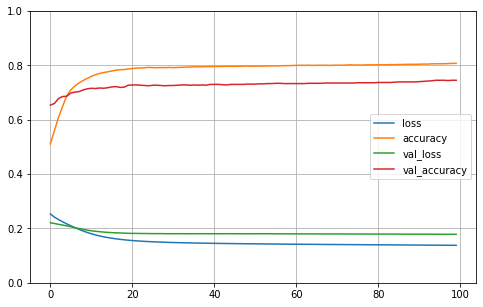

In [46]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

In [47]:
model2.evaluate(X_test,y_test)

66/66 [==============================] - 0s 1ms/step - loss: 0.1776 - accuracy: 0.7393


[0.17761395871639252, 0.7393364906311035]

In [48]:
y_pred = model2.predict(X_test)
print('Predict result: \n', y_pred[:5])
print('\n y_test: \n', y_test[:5])

Predict result: 
 [[0.3463018]
 [0.1192854]
 [0.5911847]
 [0.664051 ]
 [0.5556191]]

 y_test: 
 5560    0
403     0
3677    0
3598    0
1317    0
Name: Churn, dtype: int32


In [49]:
predictions = []
for element in y_pred:
    if element > 0.5:
        predictions.append(1)
    else:
        predictions.append(0)

print(predictions[:5])

[0, 0, 1, 1, 1]


In [50]:
print(f"ACCURACY SCORE:\n{accuracy_score(y_test, predictions):.4f}")
print(f"Recall SCORE:\n{recall_score(y_test, predictions)}")
print(f"ROC_AUC SCORE:\n{roc_auc_score(y_test, predictions)}\n")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, predictions)}")

ACCURACY SCORE:
0.7393
Recall SCORE:
0.7112299465240641
ROC_AUC SCORE:
0.7303728815899856

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1549
           1       0.51      0.71      0.59       561

    accuracy                           0.74      2110
   macro avg       0.69      0.73      0.70      2110
weighted avg       0.78      0.74      0.75      2110



### Model Improvement (Hyperparameter Tuning ANN Functional API)

In [51]:
keras.backend.clear_session()
np.random.seed(2021)
tf.random.set_seed(2021)

In [52]:
def build_model_func(optimizer, kernel, units):
    input_ = keras.layers.Input(shape=X_train.shape[1:])
    
    #Hidden Layer
    hidden1 = keras.layers.Dense(units=units, activation="relu", kernel_initializer=kernel)(input_)
    hidden2 = keras.layers.Dense(units=units, activation="relu", kernel_initializer=kernel)(hidden1)
    concat = keras.layers.concatenate([input_, hidden2])
    
    #Output Layer
    output = keras.layers.Dense(1, activation="sigmoid")(concat)
    
    model_func = keras.models.Model(inputs=[input_], outputs=[output])
    
    model_func.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["accuracy"])
    return model_func

In [53]:
model_best_func = keras.wrappers.scikit_learn.KerasClassifier(build_model_func)

In [54]:
parameters = {
    'optimizer':['adam','nadam'],
    'kernel':['random_uniform', 'random_normal'],
    'units':[30,40]
}

grid_cv = GridSearchCV(model_best_func, parameters, cv=5, verbose=2, n_jobs=-1)
%time grid_cv.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Epoch 1/100
183/183 [==============================] - 1s 1ms/step - loss: 0.1755 - accuracy: 0.7264 - val_loss: 0.1849 - val_accuracy: 0.7168
Epoch 2/100
183/183 [==============================] - 0s 1ms/step - loss: 0.1396 - accuracy: 0.8031 - val_loss: 0.1714 - val_accuracy: 0.7452
Epoch 3/100
183/183 [==============================] - 0s 1ms/step - loss: 0.1360 - accuracy: 0.8056 - val_loss: 0.1809 - val_accuracy: 0.7360
Epoch 4/100
183/183 [==============================] - 0s 1ms/step - loss: 0.1344 - accuracy: 0.8079 - val_loss: 0.1668 - val_accuracy: 0.7665
Epoch 5/100
183/183 [==============================] - 0s 1ms/step - loss: 0.1329 - accuracy: 0.8111 - val_loss: 0.1737 - val_accuracy: 0.7503
Epoch 6/100
183/183 [==============================] - 0s 1ms/step - loss: 0.1314 - accuracy: 0.8145 - val_loss: 0.1763 - val_accuracy: 0.7431
Epoch 7/100
183/183 [==============================] - 0s 973us/step - loss: 0.129

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000027A7D2D1790>,
             n_jobs=-1,
             param_grid={'kernel': ['random_uniform', 'random_normal'],
                         'optimizer': ['adam', 'nadam'], 'units': [30, 40]},
             verbose=2)

In [55]:
print('Grid Search Best score', grid_cv.best_score_)
print('Grid Search Best Parameters', grid_cv.best_params_)

Grid Search Best score 0.8160955667495727
Grid Search Best Parameters {'kernel': 'random_normal', 'optimizer': 'adam', 'units': 40}


In [56]:
grid_cv.score(X_val, y_val)

31/31 [==============================] - 0s 967us/step - loss: 0.1756 - accuracy: 0.7401


0.7401015162467957

In [57]:
grid_cv.best_estimator_

In [58]:
# Hasil evaluasi model dari gridCV
model_func_gridCV = grid_cv.best_estimator_.model

model_func_gridCV.evaluate(X_val, y_val)

31/31 [==============================] - 0s 767us/step - loss: 0.1756 - accuracy: 0.7401


[0.17555074393749237, 0.7401015162467957]

In [59]:
pred_grid = model_func_gridCV.predict(X_test)
print('Predict result: \n', pred_grid[:5])
print('\n y_test: \n', y_test[:5])

predict_grid = []
for element in pred_grid:
    if element > 0.5:
        predict_grid.append(1)
    else:
        predict_grid.append(0)

print('\n',predict_grid[:5])

Predict result: 
 [[0.39440575]
 [0.09059763]
 [0.35159007]
 [0.7188599 ]
 [0.36007422]]

 y_test: 
 5560    0
403     0
3677    0
3598    0
1317    0
Name: Churn, dtype: int32

 [0, 0, 0, 1, 0]


In [60]:
print(f"ACCURACY SCORE:\n{accuracy_score(y_test, predict_grid):.4f}")
print(f"Recall:\n{recall_score(y_test, predict_grid)}")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, predict_grid)}")

ACCURACY SCORE:
0.7450
Recall:
0.6327985739750446
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1549
           1       0.52      0.63      0.57       561

    accuracy                           0.75      2110
   macro avg       0.69      0.71      0.69      2110
weighted avg       0.77      0.75      0.75      2110



### x. Model Inference

In [70]:
model_func_gridCV.save("Model.h5")

In [71]:
pd.set_option('display.max_columns', 500)
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [72]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [73]:
# Pembuatan data inference
databaru =[{'gender':'female', 
            'SeniorCitizen':'No', 
            'Partner':'Yes', 
            'Dependents':'Yes', 
            'tenure':23,
            'PhoneService':'Yes', 
            'MultipleLines':'Yes', 
            'InternetService':'DSL', 
            'OnlineSecurity':'No',
            'OnlineBackup':'No', 
            'DeviceProtection':'Yes', 
            'TechSupport':'Yes',
            'StreamingTV':'No',
            'StreamingMovies':'Yes', 
            'Contract':'Month-to-month', 
            'PaperlessBilling':'Yes', 
            'PaymentMethod':'Electronic check',
            'MonthlyCharges':32, 
            'TotalCharges':32}]

percobaan_1 =pd.DataFrame(databaru,index=[1])
percobaan_1


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1,female,No,Yes,Yes,23,Yes,Yes,DSL,No,No,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,32,32


In [74]:
encoded1 = percobaan_1.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
encoded1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1,0,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0,0,32,32


In [76]:
model = keras.models.load_model("Model.h5")

In [77]:
pred = model.predict(encoded1)

In [78]:
pred

array([[1.]], dtype=float32)

In [79]:
if pred>0.5:
    print('Churn')
else:
    print('Not Churn')

Churn


### ix. Pengambilan Kesimpulan

### Base Model Sequensial
Secara umum model dinilai telah cukup baik membaca pergerakan data dan melakukan proses model inference, walaupun terdapat indikasi underfitting hal tersebut dapat dimaklumi dikarenakan sequential ANN memiliki keterbatasan dalam mempelajari data, namun terdapat catatan sebagai berikut apabila ingin tetap menggunakan Sequential ANN sebagai model utama
 - dengan nilai recall dan accuracy 
 - ACCURACY SCORE:
0.7379
- Recall Score:
0.7308377896613191

> best model dapat ditingkatkan performance nya apabila :
* dilakukan scaler dengan menggunakan robust scaler, saat ini data masih diasumsikan sebagai data distribusi normal, padahal seperti yang digambarkan pada eda dan proses label imbalance terdapat skewness ke satu arah tertentu

### Functional API and GridSearch Cv

Selu Activation ftw, selu activation secara sangat baik telah mempelajari pergerakan data, dengan kombinasi antara lecun_normal sebagai initializer dan asumsi bahwa data adalah distribusi normal dengan dibantu standardscaller, model berhasil membaca pola tanpa adanya indikasi overfitting


- ACCURACY SCORE:
0.7393
- Recall SCORE:
0.7112299465240641

Grid CV
- ACCURACY SCORE:
0.7450
Recall:
- 0.6327985739750446


accuracy membaik teatapi rekal menurun.


### Data Analysist

Dari sisi bisnis dapat terlihat bahwa ada segmen konsumen yang perlu dimaintain, utamanya yang berkaitan dengan konsumen yang memiliki kecenderungan highspender (dapat dilihat dari total charges) dengan metode pembayaran otomatis.

perlu juga dilakukan pendekatan marketting lebih lanjut kepada konsumen yang memiliki tingkat awareness terhadap OnlineSecurity untuk dapat menggunakan layanan lainnya yang belum mereka gunakan, dikarenakan pelanggan dengan OnlineSecurity Awareness memiliki kecenderungan menjadi pelanggan setia (kemungkinan untuk churn rendah) 
